<a id='definition'></a>
# What is the problem?
- Somebody hired me to help on decide which properties to invest in Rio de Janeiro (City of Brazil). 
    - To solve the problema we need to predict the price of renting real estate in Rio De Janeiro using Airbnb. The obejective of get a aprtment that bring faster return on investment     

As a Data Science Project I going to follow this steps:
1. [Define the Problem](#definition)
2. [Understanding and Processing of Data](#data)
3. [Exploratory Analysis](#analysis)
4. [Data Processing](#processing)
5. [Model Definition](#model)
6. [Deploy](#deploy)

- Para entender o problema, algumas perguntas são fundamentais:
    - De forma direta: **"Qual problema eu quero resolver?"**
    - Quais são minha métricas de sucesso?
    - Qual o prazo desejado para esse projeto?
    - Quem são os interessados nesse resultado?
    - Quais são os **dados** disponíveis
    

<a id='data'></a>
## Understanding and Processing of Data


In [3]:
#Import 
import pandas as pd

import seaborn as sns

In [4]:
#Importing database from Kaggle : https://www.kaggle.com/datasets/dantebarros/transformed-data-from-quinto-andars-platform 
data_base = pd.read_csv("quinto_andar_transformed_data.csv")

In [5]:
#Checking the some rows in the database
data_base.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [6]:
#Checking the information in the database
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


**Understanding null values**

In [7]:
# Checking null values
data_base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [8]:
# Filtering null values
data_base[data_base.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Checking the url from null rows in the column condominio
# data_base.url[987]
# data_base.url[1391]
# data_base.url[1527]
# data_base.url[1801]
# data_base.url[2287]
data_base.url[2751]

'https://www.quintoandar.com.br/imovel/892887961?search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A525%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

**In this case null values from column condominio is houses. In Brazil we don't pay the condominio for houses, then we can replace with zero**


In [10]:
# Filtering and inserting zero to null value in column named condominio
data_base.condominio[data_base.condominio.isnull()] = 0 


C:\Users\felip\AppData\Local\Temp\ipykernel_30220\558900936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base.condominio[data_base.condominio.isnull()] = 0


In [11]:
# Rechecking null values
data_base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [12]:
# Same process
data_base[data_base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [13]:
# Checking the url from null rows in the column iptu
data_base.url[321]

'https://www.quintoandar.com.br/imovel/892783321?search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A904%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [14]:
# After checking we discover that we have the value of iptu for row 321
data_base.iptu[321] = 72

C:\Users\felip\AppData\Local\Temp\ipykernel_30220\190865382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base.iptu[321] = 72


In [15]:
data_base.url[580] #real state unavailable 
data_base.url[732] #real state unavailable 
data_base.url[1348] #real state unavailable 
data_base.url[1486] #real state unavailable 
data_base.url[1709] #real state unavailable 
data_base.url[2209] #real state unavailable 
data_base.url[2659] #real state unavailable 

'https://www.quintoandar.com.br/imovel/892794542?house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A428%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [16]:
# Removing all real state unavailable
data_base = data_base.dropna(axis = 0)

In [17]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2768 non-null   object 
 1   bairro           2768 non-null   object 
 2   aluguel          2768 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2768 non-null   float64
 5   seguro_incendio  2768 non-null   float64
 6   taxa_serviço     2768 non-null   float64
 7   total            2768 non-null   float64
 8   metragem         2768 non-null   float64
 9   quarto           2768 non-null   float64
 10  banheiro         2768 non-null   float64
 11  vaga_carro       2768 non-null   float64
 12  andar            2768 non-null   float64
 13  aceita_pet       2768 non-null   float64
 14  mobilia          2768 non-null   float64
 15  metro_prox       2768 non-null   float64
dtypes: float64(14), object(2)
memory usage: 367.6+ KB


In [18]:
# Url isn't important any more
data_base = data_base.drop('url', axis = 1)

<a id='analysis'></a>
##  Exploratory Analysis
- Exploring our data base

In [19]:
# Statistical summary
data_base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,2276.883309,596.216402,283.485549,29.928468,45.334899,3233.002168,63.763728,1.593569,1.398483,0.627168,5.926301,0.775289,0.201951,0.733743
std,1327.731975,430.424070,9422.954740,17.659243,26.583854,9599.149304,38.673971,0.748874,0.686878,0.674068,5.000577,0.417467,0.401528,0.442080
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2740.000000,800.000000,140.000000,36.000000,54.000000,3752.250000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

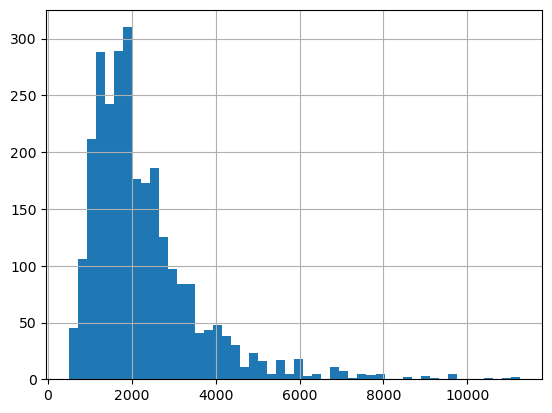

In [20]:
# Plotting a histogram
data_base.aluguel.hist(bins=50)

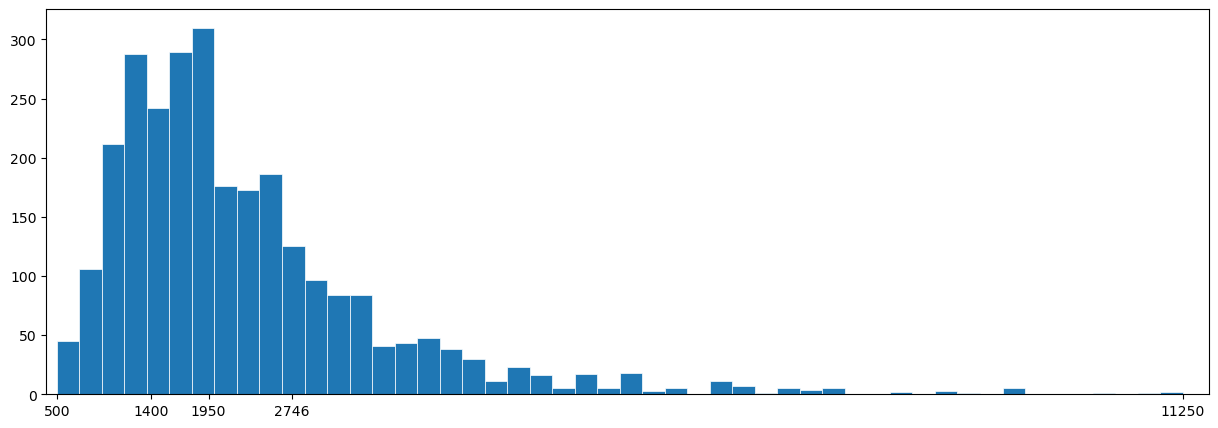

In [21]:
# improving histogram visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(data_base.aluguel, bins=50, linewidth=0.5, edgecolor="white")

ax.set(xlim=(400, 11500), xticks=[500,1400,1950,2746.5,11250])

plt.show()

In [22]:
# showing the ranges and number of values ​​in each range of that histogram
import numpy as np
np.histogram(data_base.aluguel,bins=50)

(array([ 45, 106, 212, 288, 242, 289, 310, 176, 173, 186, 125,  97,  84,
         84,  41,  43,  48,  38,  30,  11,  23,  16,   5,  17,   5,  18,
          3,   5,   0,  11,   7,   1,   5,   4,   5,   0,   0,   2,   0,
          3,   1,   0,   5,   0,   0,   0,   1,   0,   1,   2], dtype=int64),
 array([  500.,   715.,   930.,  1145.,  1360.,  1575.,  1790.,  2005.,
         2220.,  2435.,  2650.,  2865.,  3080.,  3295.,  3510.,  3725.,
         3940.,  4155.,  4370.,  4585.,  4800.,  5015.,  5230.,  5445.,
         5660.,  5875.,  6090.,  6305.,  6520.,  6735.,  6950.,  7165.,
         7380.,  7595.,  7810.,  8025.,  8240.,  8455.,  8670.,  8885.,
         9100.,  9315.,  9530.,  9745.,  9960., 10175., 10390., 10605.,
        10820., 11035., 11250.]))

<AxesSubplot:>

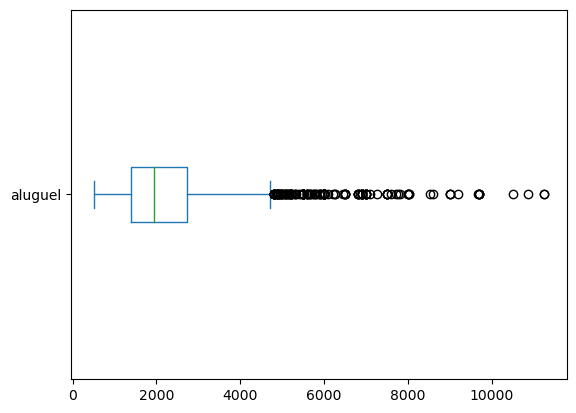

In [23]:
# Plotting the boxplot
data_base.aluguel.plot.box(vert = False)

In [24]:
# Checking the most expensive rents
data_base.sort_values('aluguel', ascending = False).head(20)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


In [25]:
# Removing duplicate values
data_base = data_base.drop_duplicates(keep='last')

In [26]:
data_base.sort_values('aluguel', ascending=False).head(20)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0
1505,Jardim Paulista,9000.0,2480.0,496.0,115.0,180.0,12270.0,160.0,3.0,4.0,1.0,7.0,1.0,0.0,1.0
2047,Vila Olímpia,8999.0,2300.0,616.0,115.0,179.0,12210.0,128.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0
680,Jardim Paulista,8990.0,1362.0,352.0,114.0,179.0,11000.0,140.0,2.0,3.0,1.0,19.0,1.0,0.0,1.0


<AxesSubplot:xlabel='metragem', ylabel='aluguel'>

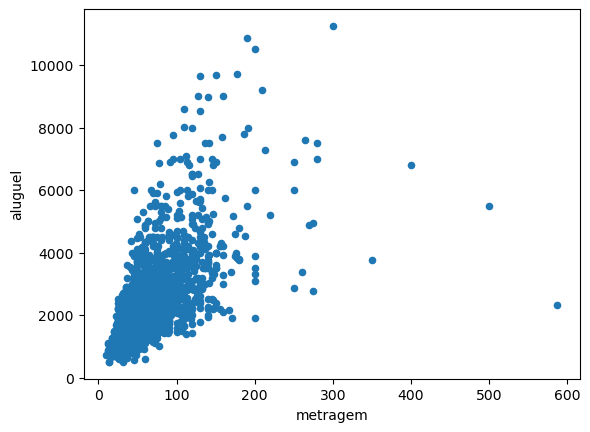

In [27]:
# Checking relationship between metragem and aluguel

data_base.plot.scatter(x='metragem', y='aluguel')

<AxesSubplot:xlabel='metro_prox', ylabel='aluguel'>

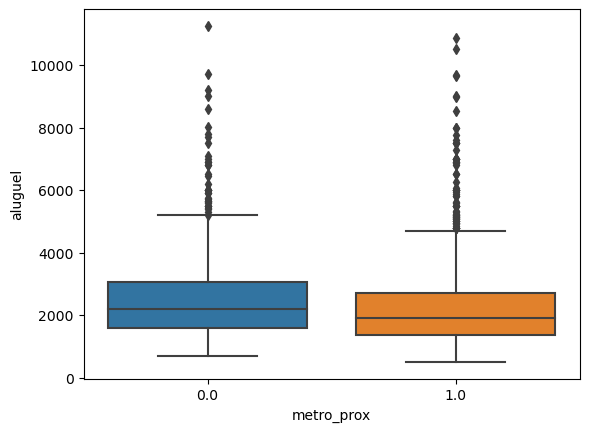

In [28]:
# Importing seaborn
import seaborn as sns
sns.boxplot(x='metro_prox', y='aluguel', data= data_base)

<AxesSubplot:xlabel='aluguel', ylabel='bairro'>

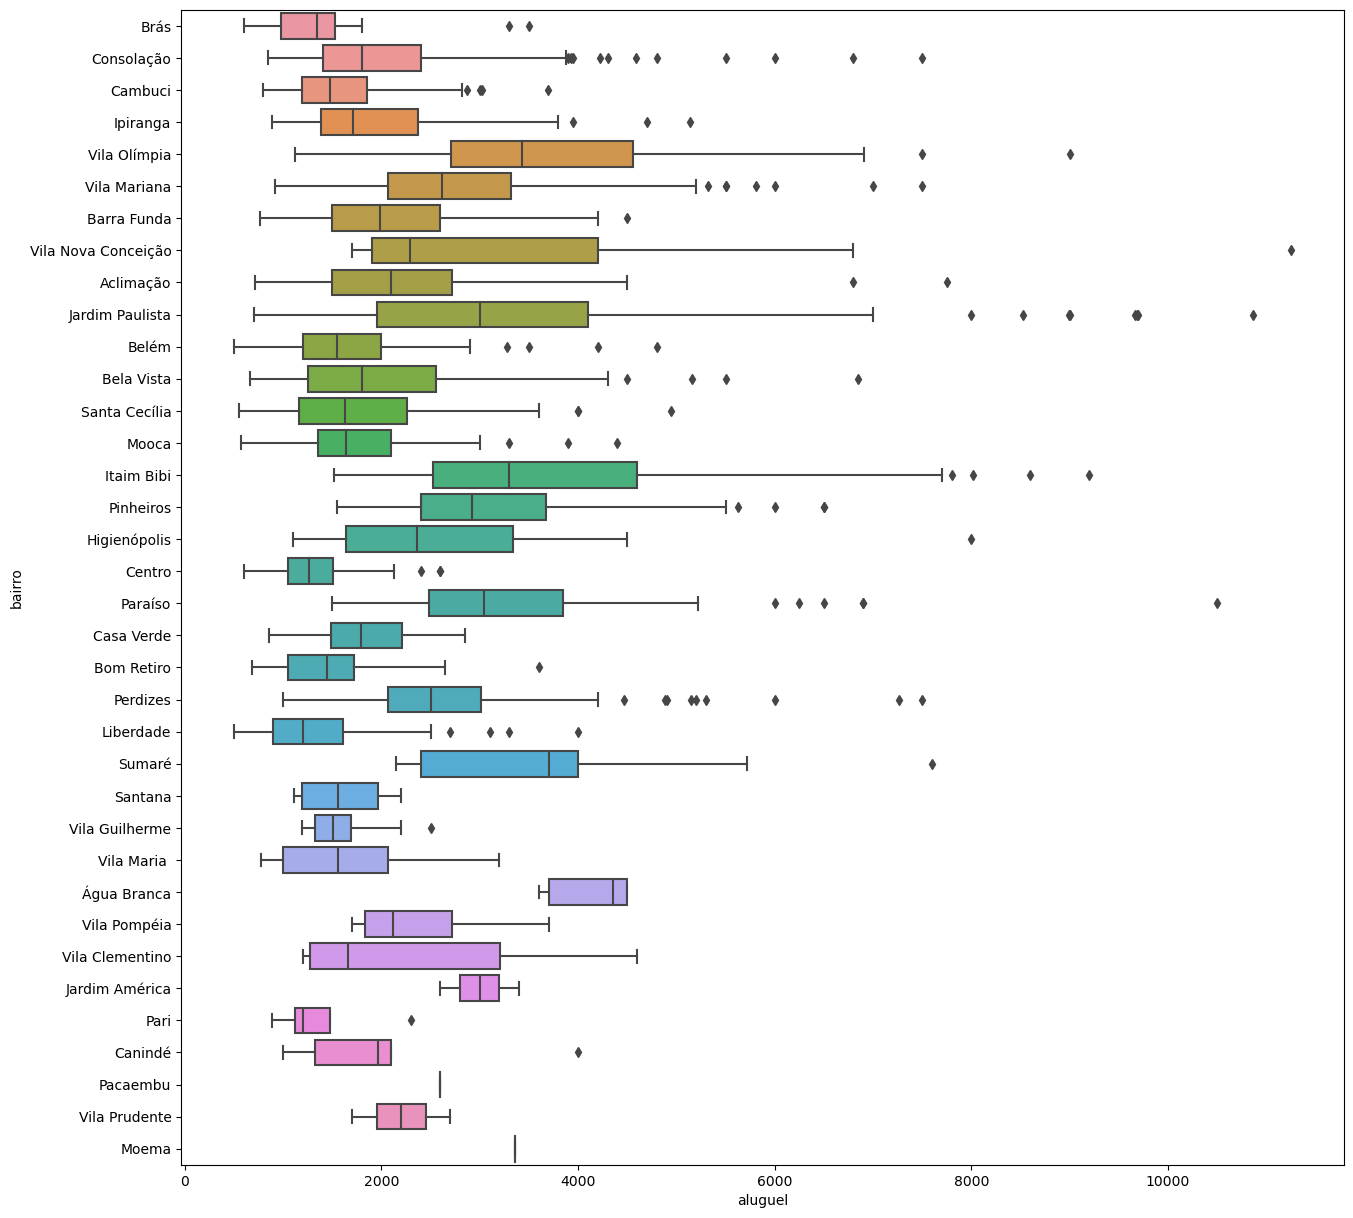

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='aluguel', y='bairro', data= data_base, orient='h', )


In [30]:
data_base.bairro.value_counts()

Consolação             271
Jardim Paulista        191
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Jardim América           2
Vila Prudente            2
Pacaembu                 1
Moema                    1
Name: bairro, dtype: int64

In [31]:
# It is better to group by regions (regioes) instead of neighborhoods (bairros)
regioes = pd.read_excel('bairros.xlsx')

regioes.head(5)

,Bairro,Região
0,Sé,Centro
1,Bela Vista,Centro
2,Bom Retiro,Centro
3,Cambuci,Centro
4,Consolação,Centro


In [32]:
#Merge regioes and bairros
data_base_merged = pd.merge(data_base, regioes, how='left', left_on='bairro', right_on='Bairro' )
data_base_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bairro           2235 non-null   object 
 1   aluguel          2235 non-null   float64
 2   condominio       2235 non-null   float64
 3   iptu             2235 non-null   float64
 4   seguro_incendio  2235 non-null   float64
 5   taxa_serviço     2235 non-null   float64
 6   total            2235 non-null   float64
 7   metragem         2235 non-null   float64
 8   quarto           2235 non-null   float64
 9   banheiro         2235 non-null   float64
 10  vaga_carro       2235 non-null   float64
 11  andar            2235 non-null   float64
 12  aceita_pet       2235 non-null   float64
 13  mobilia          2235 non-null   float64
 14  metro_prox       2235 non-null   float64
 15  Bairro           2229 non-null   object 
 16  Região           2229 non-null   object 
dtypes: float64(14)

In [33]:
data_base_merged[data_base_merged.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
235,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
821,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1263,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
1685,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
1846,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
2228,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [34]:
data_base_merged.loc[data_base_merged.Região.isnull(),'bairro']
#found a space after the Vila Maria, this bring a error in merging bases. That why on bairro = Vila Maria -> Região = NaN

235     Vila Maria 
821     Vila Maria 
1263    Vila Maria 
1685    Vila Maria 
1846    Vila Maria 
2228    Vila Maria 
Name: bairro, dtype: object

In [35]:
#Fixing the error
data_base_merged.loc[data_base_merged.Região.isnull(),'Região'] = 'Norte'
data_base_merged.loc[data_base_merged.bairro == 'Vila Maria ', 'bairro'] = 'Vila Maria'

In [36]:
data_base_merged.loc[data_base_merged.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


<AxesSubplot:xlabel='aluguel', ylabel='Região'>

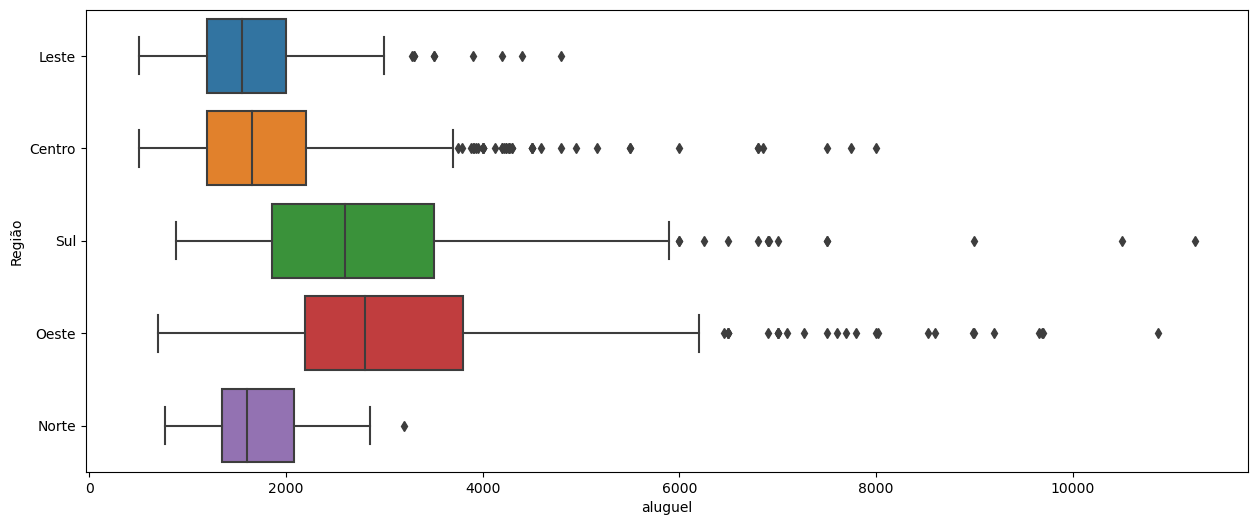

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='aluguel', y='Região', data= data_base_merged, orient='h', )


In [38]:
data_base_merged.Região.value_counts()

Centro    1048
Oeste      680
Sul        282
Leste      169
Norte       56
Name: Região, dtype: int64

<AxesSubplot:xlabel='metragem', ylabel='aluguel'>

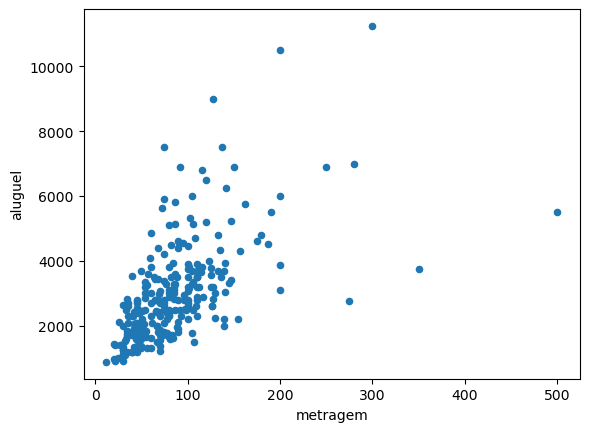

In [39]:
data_base_merged[data_base_merged.Região == 'Sul'].plot.scatter(x='metragem', y='aluguel')

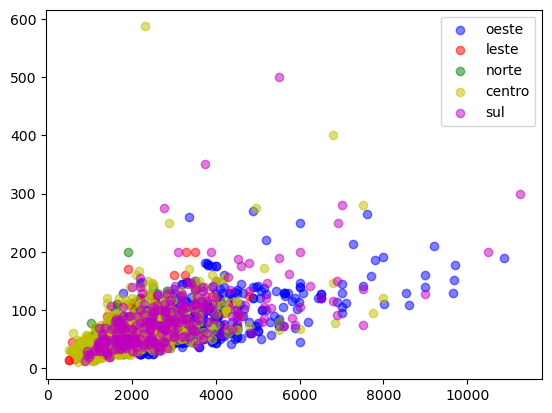

In [40]:
base = data_base_merged
# Plotting all figures on a single graph
fig, ax = plt.subplots()

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax.scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax.scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax.scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax.scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax.scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax.legend()

plt.show()

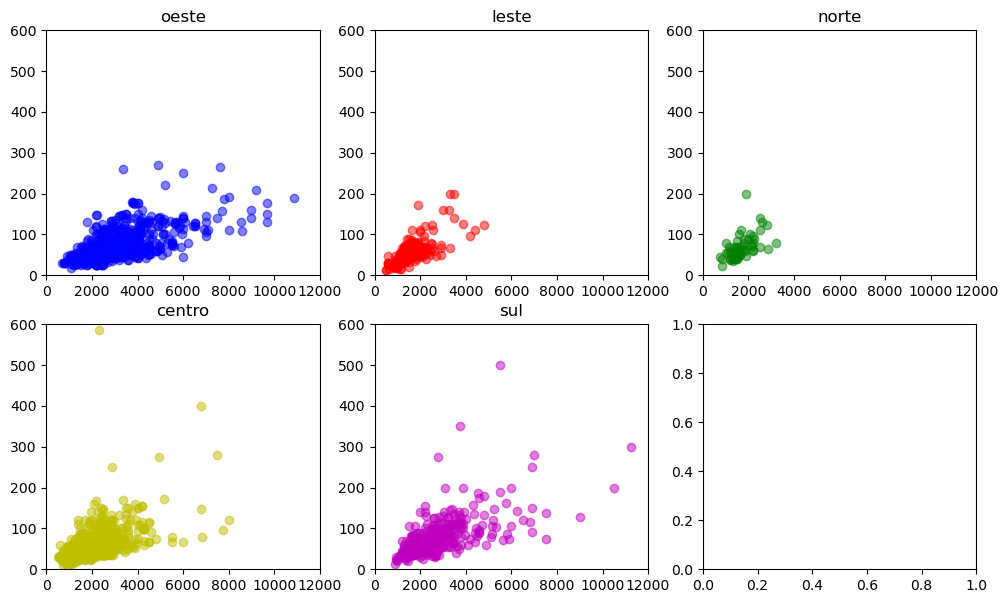

In [41]:
# Creating a chart for each region
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(12,7))

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax[0,0].scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax[0,1].scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax[0,2].scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax[1,0].scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax[1,1].scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax[0,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,1].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,2].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,1].set(xlim=(0, 12000),ylim=(0, 600))

ax[0,0].set_title('oeste')
ax[0,1].set_title('leste')
ax[0,2].set_title('norte')
ax[1,0].set_title('centro')
ax[1,1].set_title('sul')

plt.show()

In [42]:
# Verifing all corlation
data_base_merged.corr()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547635,0.028604,0.986594,0.999937,0.180084,0.625579,0.535815,0.645123,0.566263,0.117753,0.090699,0.194983,-0.107560
condominio,0.547635,1.000000,-0.022167,0.478607,0.547372,0.089460,0.410045,0.414282,0.523175,0.567050,0.242272,0.064866,0.115112,0.001132
iptu,0.028604,-0.022167,1.000000,0.043822,0.028745,0.987823,0.054082,0.073955,0.056706,-0.011622,-0.025533,0.012259,-0.010000,0.010626
seguro_incendio,0.986594,0.478607,0.043822,1.000000,0.986569,0.190586,0.662284,0.550661,0.643029,0.559876,0.072651,0.092518,0.181281,-0.122105
taxa_serviço,0.999937,0.547372,0.028745,0.986569,1.000000,0.180202,0.625684,0.536140,0.644881,0.566396,0.117393,0.091474,0.194555,-0.108011
total,0.180084,0.089460,0.987823,0.190586,0.180202,1.000000,0.151071,0.159133,0.160755,0.085028,-0.000041,0.026380,0.020144,-0.003448
metragem,0.625579,0.410045,0.054082,0.662284,0.625684,0.151071,1.000000,0.724910,0.665244,0.448453,-0.060286,0.139442,-0.054629,-0.151985
quarto,0.535815,0.414282,0.073955,0.550661,0.536140,0.159133,0.724910,1.000000,0.663399,0.445319,-0.022098,0.119113,-0.100551,-0.200845
banheiro,0.645123,0.523175,0.056706,0.643029,0.644881,0.160755,0.665244,0.663399,1.000000,0.516734,0.045220,0.071039,-0.014274,-0.142272
vaga_carro,0.566263,0.567050,-0.011622,0.559876,0.566396,0.085028,0.448453,0.445319,0.516734,1.000000,0.194070,0.064244,0.111222,-0.144081


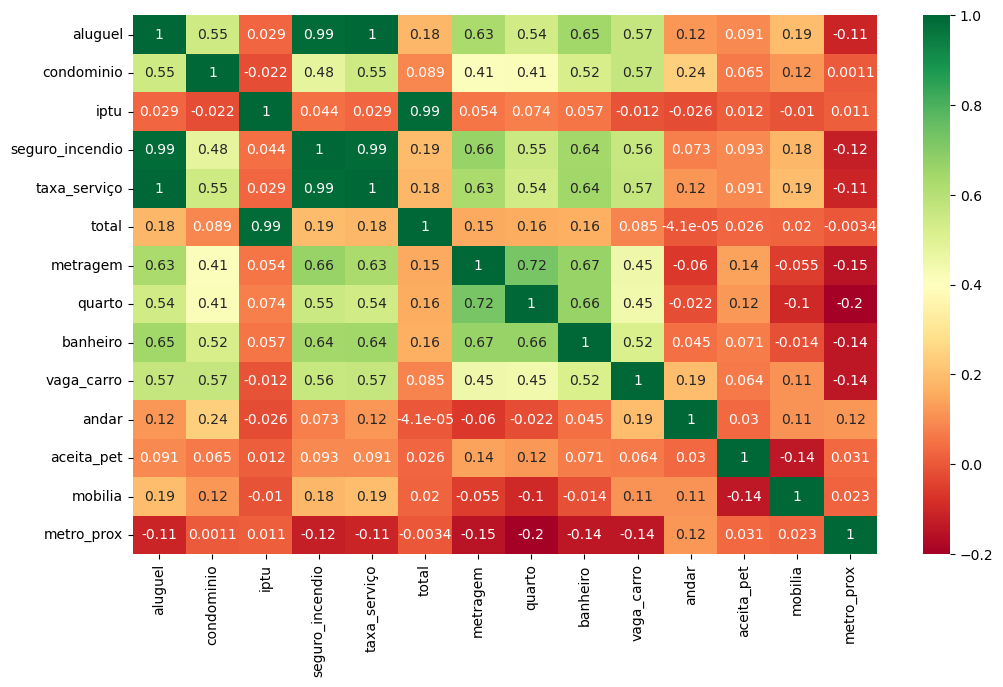

In [43]:
# Heatmap
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()

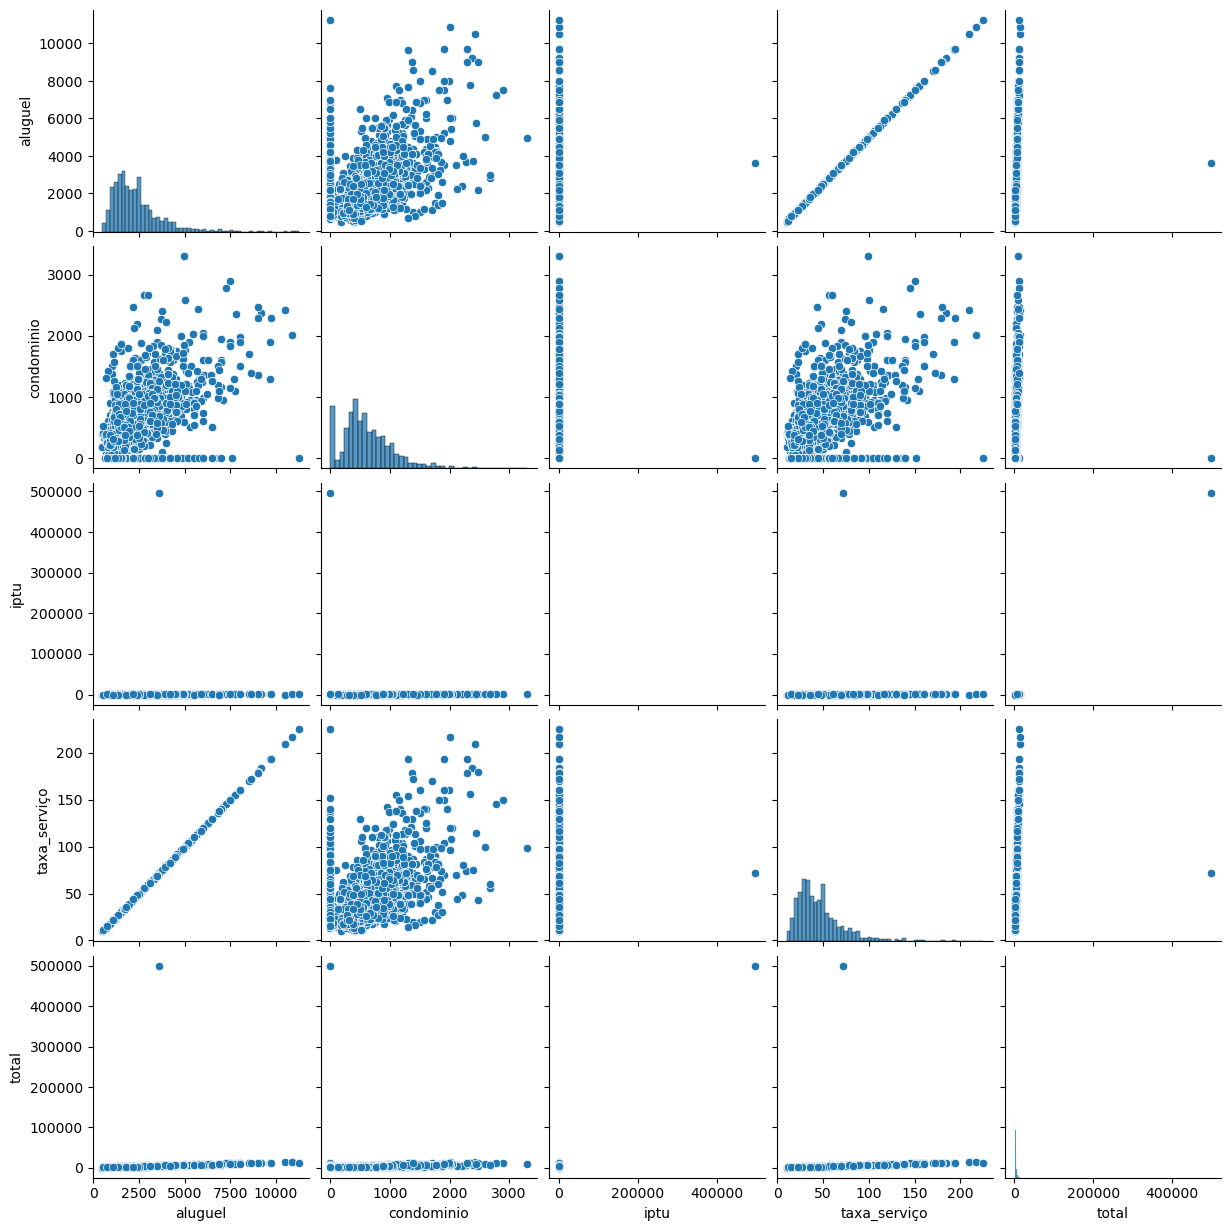

In [44]:
# pairplot
base3 = base[['aluguel','condominio','iptu','taxa_serviço','total']]
sns.pairplot(base3);

In [45]:
data_base_merged.total.max() #something rong, lets check 

499600.0

In [46]:
data_base_merged[data_base_merged.total == 499600.0]
#the iptu value is a outlier


,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1189,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [47]:
checking_url = pd.read_csv('quinto_andar_transformed_data.csv')
checking_url[checking_url.iptu == 495800.0]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,https://www.quintoandar.com.br/imovel/89337922...,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


In [48]:
checking_url.url[1707]
#the real velue of iptu is 495

'https://www.quintoandar.com.br/imovel/893379229?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2561%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [49]:
#Fixing the value of iptu
data_base_merged.iptu[data_base_merged.total == 499600.0] = 495


C:\Users\felip\AppData\Local\Temp\ipykernel_30220\624495486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base_merged.iptu[data_base_merged.total == 499600.0] = 495


In [50]:
data_base_merged.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,2351.205369,619.049217,109.319463,30.807159,46.817450,3379.931544,64.596421,1.611633,1.415213,0.648770,6.060403,0.772260,0.215660,0.759284
std,1336.067467,432.224218,152.678025,17.761020,26.750945,10647.441484,39.707604,0.755433,0.696160,0.668141,4.975987,0.419468,0.411371,0.427614
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1455.000000,347.000000,0.000000,19.000000,29.000000,1944.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
50%,2000.000000,550.000000,59.000000,26.000000,40.000000,2714.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2850.000000,850.000000,150.000000,37.000000,57.000000,3914.500000,79.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,1917.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


In [51]:
#also we need to fix total 
data_base_merged[data_base_merged.total == 499600.0]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1189,Santa Cecília,3600.0,0.0,495.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [52]:
data_base_merged.total[1189] = data_base_merged.aluguel[1189] + data_base_merged.condominio[1189] + data_base_merged.iptu[1189] + data_base_merged.seguro_incendio[1189] + data_base_merged.taxa_serviço[1189]


C:\Users\felip\AppData\Local\Temp\ipykernel_30220\21518128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base_merged.total[1189] = data_base_merged.aluguel[1189] + data_base_merged.condominio[1189] + data_base_merged.iptu[1189] + data_base_merged.seguro_incendio[1189] + data_base_merged.taxa_serviço[1189]


In [53]:
data_base_merged.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,2351.205369,619.049217,109.319463,30.807159,46.817450,3158.288143,64.596421,1.611633,1.415213,0.648770,6.060403,0.772260,0.215660,0.759284
std,1336.067467,432.224218,152.678025,17.761020,26.750945,1760.084097,39.707604,0.755433,0.696160,0.668141,4.975987,0.419468,0.411371,0.427614
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1455.000000,347.000000,0.000000,19.000000,29.000000,1944.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
50%,2000.000000,550.000000,59.000000,26.000000,40.000000,2714.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2850.000000,850.000000,150.000000,37.000000,57.000000,3914.500000,79.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,1917.000000,187.000000,225.000000,13810.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


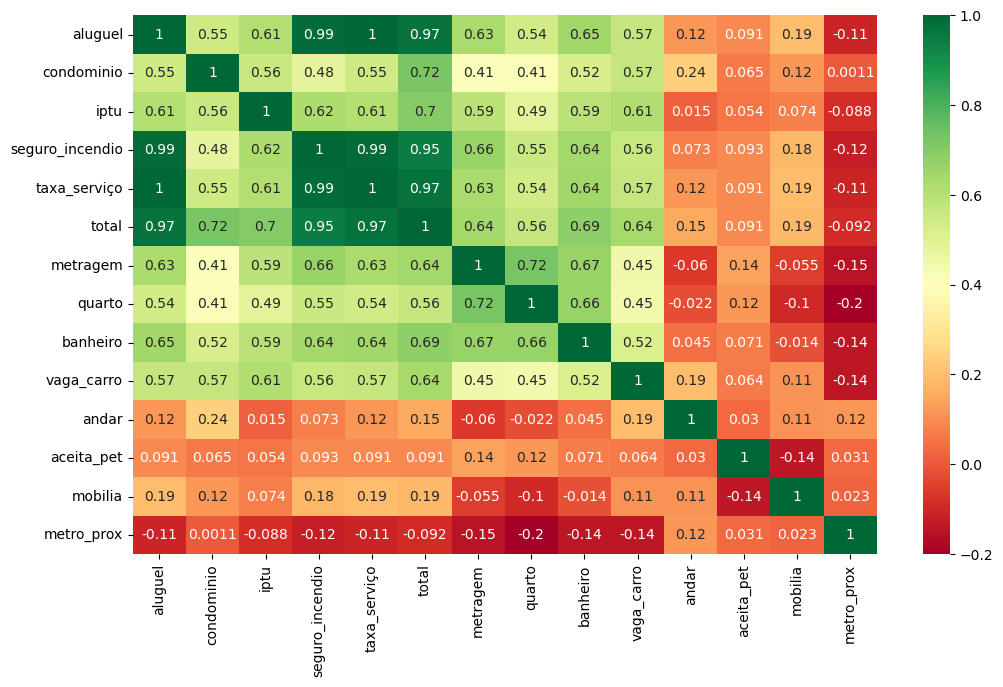

In [54]:
# Heatmap
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data_base_merged.corr(),annot=True,cmap='RdYlGn')
plt.show()

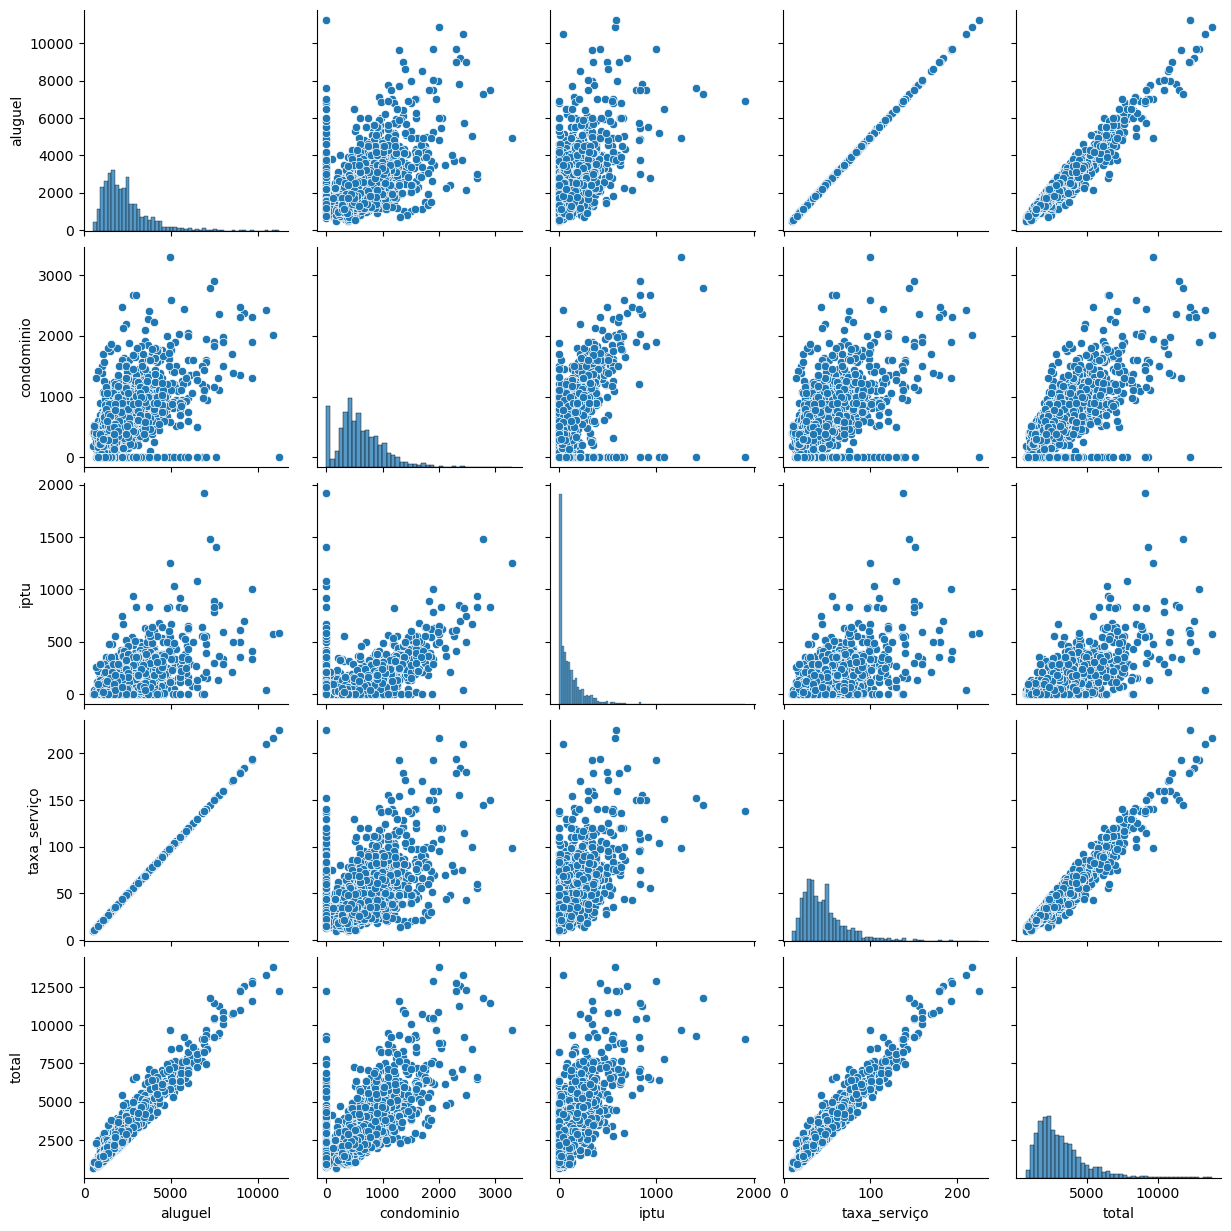

In [55]:
# pairplot
base3 = data_base_merged[['aluguel','condominio','iptu','taxa_serviço','total']]
sns.pairplot(base3);

<a id='processing'></a>
## Data Processing

In [56]:
data_base_merged.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro
3,Ipiranga,1600.0,0.0,142.0,27.0,32.0,1801.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul
4,Vila Olímpia,1700.0,1106.0,218.0,22.0,34.0,3080.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul


In [57]:
# According to heatmap taxa_serviço and aluguel have a strong relationship
round(data_base_merged.taxa_serviço/data_base_merged.aluguel*100,2)

0       2.00
1       1.96
2       2.00
3       2.00
4       2.00
        ... 
2230    2.00
2231    1.96
2232    2.00
2233    2.00
2234    1.98
Length: 2235, dtype: float64

In [58]:
#creating a new column with this new relationship
data_base_merged['taxa_ser'] = round(data_base_merged.taxa_serviço/data_base_merged.aluguel*100,2)
data_base_merged.taxa_ser.value_counts()

# the service fee (taxa_serviço) is calculated based on the rent amount (aluguel) so we cannot predict the rent according to the service fee

2.00    1374
1.99     206
1.98     204
1.96     130
1.97     129
1.95      49
1.93      48
1.94      45
1.92      19
1.91      10
1.90       9
1.88       5
2.01       2
2.02       2
2.07       1
1.89       1
2.03       1
Name: taxa_ser, dtype: int64

In [59]:
data_base_merged['taxa_incendio'] = round(data_base_merged.seguro_incendio/data_base_merged.aluguel*100,2)
data_base_merged.taxa_incendio.value_counts()

#the taxa_incendio is almost the same, don't have big difference 

1.28    435
1.29    434
1.27    427
1.30    290
1.31    197
1.33    147
1.32     84
1.34     37
1.67     32
1.68     29
1.35     15
1.66     15
1.37     15
1.36     14
1.69     11
1.70     11
1.38     10
1.65      6
1.39      4
1.71      4
1.41      4
1.75      3
1.40      3
1.74      1
1.76      1
0.66      1
0.29      1
1.85      1
1.23      1
0.48      1
1.43      1
Name: taxa_incendio, dtype: int64


**The service fee (taxa_serviço) and fire insurance (seguro_incendio) are percentages of the rent (aluguel), so to get the fee, you must first have the rent amount.** <br>
**In the same way, the total is also the sum of the values ​​already presented, so putting the total would be repeating information**

In [60]:
# Then we need to delete that column and the column percentage to avoid errors in our model
data_base_merged = data_base_merged.drop(['taxa_incendio', 'taxa_ser', 'taxa_serviço', 'seguro_incendio'], axis=1)

In [61]:
# Making the same for IPTU
data_base_merged['taxa_iptu'] = round(data_base_merged.iptu/data_base_merged.aluguel,2)
data_base_merged.taxa_iptu.value_counts()

0.00    671
0.03    228
0.04    189
0.05    184
0.06    175
0.02    173
0.07    127
0.01    115
0.08     82
0.09     65
0.10     55
0.11     31
0.12     25
0.13     23
0.14     16
0.18     13
0.15     12
0.17     12
0.16      9
0.20      5
0.19      5
0.28      4
0.23      2
0.26      2
0.30      2
0.31      2
0.21      1
0.24      1
0.25      1
0.34      1
0.22      1
0.33      1
0.35      1
0.36      1
Name: taxa_iptu, dtype: int64

In [62]:
# We can keep the IPTU column, because the IPTU is not related only with rent (aluguel). But we must remove this column that we use to calculate
data_base_merged = data_base_merged.drop('taxa_iptu', axis=1)

In [63]:
#total is calculated from ('aluguel', 'iptu', 'taxa_serviço', 'seguro_incendio') so we don't need total beacause is consequence of what was removed
data_base_merged = data_base_merged.drop('total', axis=1)

**Alguns modelos não conseguem trabalhar com texto, então também precisamos transformar colunas que estiverem como texto**

In [64]:
# Checking base
data_base_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      2235 non-null   object 
 1   aluguel     2235 non-null   float64
 2   condominio  2235 non-null   float64
 3   iptu        2235 non-null   float64
 4   metragem    2235 non-null   float64
 5   quarto      2235 non-null   float64
 6   banheiro    2235 non-null   float64
 7   vaga_carro  2235 non-null   float64
 8   andar       2235 non-null   float64
 9   aceita_pet  2235 non-null   float64
 10  mobilia     2235 non-null   float64
 11  metro_prox  2235 non-null   float64
 12  Bairro      2229 non-null   object 
 13  Região      2235 non-null   object 
dtypes: float64(11), object(3)
memory usage: 326.5+ KB


In [65]:
#  Deleting columns that are irrelevant
data_base_merged = data_base_merged.drop(['bairro','Bairro'], axis=1)

In [66]:
#Due to model don't work well with strings we will do the One Hot Encoding in the column named by Região. To transform into new umerical columns 
pd.get_dummies(data_base_merged.Região)

,Centro,Leste,Norte,Oeste,Sul
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2230,1,0,0,0,0
2231,1,0,0,0,0
2232,0,1,0,0,0
2233,1,0,0,0,0


In [67]:
# Using o concat
data_base_merged = pd.concat([data_base_merged, pd.get_dummies(data_base_merged.Região)], axis=1)
data_base_merged.head()

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Leste,0,1,0,0,0
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro,1,0,0,0,0
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Centro,1,0,0,0,0
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Sul,0,0,0,0,1
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Sul,0,0,0,0,1


In [68]:
# Checking data base
data_base_merged = data_base_merged.drop('Região', axis=1)


In [69]:
data_base_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aluguel     2235 non-null   float64
 1   condominio  2235 non-null   float64
 2   iptu        2235 non-null   float64
 3   metragem    2235 non-null   float64
 4   quarto      2235 non-null   float64
 5   banheiro    2235 non-null   float64
 6   vaga_carro  2235 non-null   float64
 7   andar       2235 non-null   float64
 8   aceita_pet  2235 non-null   float64
 9   mobilia     2235 non-null   float64
 10  metro_prox  2235 non-null   float64
 11  Centro      2235 non-null   uint8  
 12  Leste       2235 non-null   uint8  
 13  Norte       2235 non-null   uint8  
 14  Oeste       2235 non-null   uint8  
 15  Sul         2235 non-null   uint8  
dtypes: float64(11), uint8(5)
memory usage: 285.0 KB


<a id='model'></a>
## Model Definition

- Due to our aplication is to predict a continuous-value attribute associated with an object and we have examples to training the Machine

**Before defining the model , the first step is to separate our data intto training and testing**
- Using train_test_split from Scikit-Learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [89]:
# X - Variables / y -> target (predict value)
from sklearn.model_selection import train_test_split

X = data_base_merged.drop('aluguel', axis=1)
y = data_base_merged.aluguel

In [90]:
# Separate our base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
310,516.0,0.0,42.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1,0,0,0,0
916,981.0,156.0,90.0,2.0,2.0,1.0,10.0,1.0,0.0,0.0,0,0,0,1,0
1626,620.0,74.0,42.0,1.0,1.0,1.0,11.0,1.0,0.0,1.0,0,0,0,1,0
425,450.0,75.0,80.0,2.0,1.0,0.0,4.0,1.0,1.0,1.0,1,0,0,0,0
2229,771.0,42.0,69.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0,0,1,0,0,0


**Start using a Regression Linear**
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [91]:
# Importing Regression Linear
from sklearn.linear_model import LinearRegression

#Training our model
reg = LinearRegression().fit(X_train, y_train)

In [92]:
# Analysing our model to Training data
reg.score(X_train, y_train)

0.6558146554723625

**Using test data with metrics to analyze the erro on this model**


In [93]:
# Importing the mean absolute error
from sklearn.metrics import mean_absolute_error

# Predict the rent using the model trained
y_predict = reg.predict(X_test) 

In [94]:
# Checking error
mean_absolute_error(y_test, y_predict)

543.6300621904896

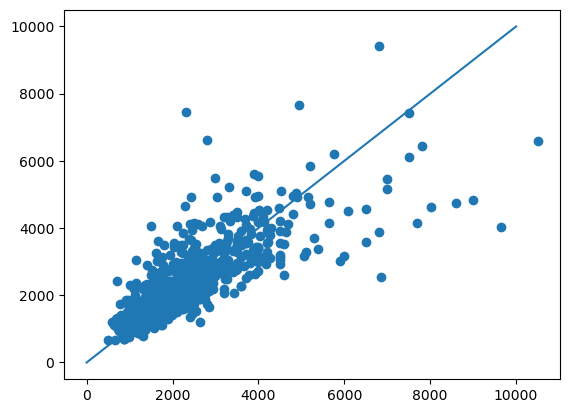

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([0, 10000], [0,10000])
plt.show()

**Compare with other model - Decision Tree Regression**
- https://scikit-learn.org/stable/modules/tree.html#regression

In [112]:
# Import
from sklearn import tree

#Creating model
reg_tree = tree.DecisionTreeRegressor(random_state = 42)

#making model fit
reg_tree = reg_tree.fit(X_train, y_train)

In [113]:
# Evaluation the model with training data
reg_tree.score(X_train, y_train)

0.9999967801225856

In [114]:
# Making the predict
y_predict_tree = reg_tree.predict(X_test)

In [115]:
# Checking error
mean_absolute_error(y_test, y_predict_tree)

682.5316169828365

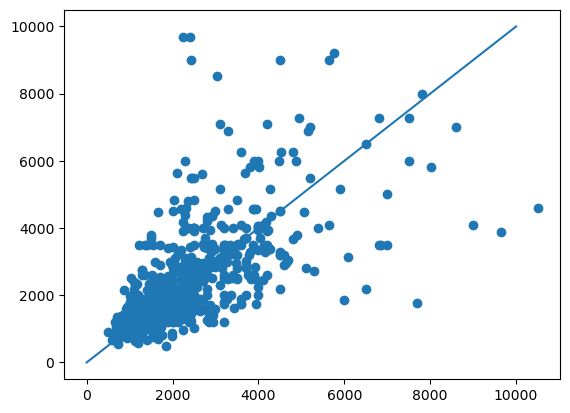

In [116]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_tree)
ax.plot([0, 10000], [0,10000])
plt.show()

In [117]:
# Importing mean square error
from sklearn.metrics import mean_squared_error

In [118]:
# Evaluating for regression
mean_squared_error(y_test, y_predict)

693881.7987662435

In [119]:
# Evaluating for tree decision
mean_squared_error(y_test, y_predict_tree)

1331489.0570611262

In [120]:
# Relembrando os valores anteriores
print('Linear Regression')
print('before: '+str(mean_absolute_error(y_test, y_predict)))
print('Tree Regression')
print('before: '+str(mean_absolute_error(y_test, y_predict_tree)))

Linear Regression
before: 543.6300621904896
Tree Regression
before: 682.5316169828365


**Let's try to change some parameters in tree model**

In [131]:
#Creating model
reg_tree2 = tree.DecisionTreeRegressor(random_state = 42, criterion='friedman_mse', max_depth = 7)

#making model fit
reg_tree2 = reg_tree2.fit(X_train, y_train)

# Making the predict
y_predict_tree2 = reg_tree2.predict(X_test)

# Checking error
mean_absolute_error(y_test, y_predict_tree2)

589.2527546945466

In [132]:
# Percorrendo uma lista de parâmetros
depth = [2,3,4,5,6,7,8,9,10]
criterios = ['friedman_mse','absolute_error','poisson']
menor_valor = mean_absolute_error(y_test, y_predict_tree)
menor_i = ''
menor_j = ''

for i in depth:
    for j in criterios:
        regArvore2 = tree.DecisionTreeRegressor(random_state=42,max_depth=i,criterion=j)
        regArvore2 = regArvore2.fit(X_train, y_train)
        y_predArvore2 = regArvore2.predict(X_test)
        valor = mean_absolute_error(y_test, y_predArvore2)
        if valor < menor_valor:
            menor_valor = valor
            menor_i = i
            menor_j = j
            menor_y_predArvore2 = y_predArvore2
        print(mean_absolute_error(y_test, y_predArvore2))
        
print(menor_i,menor_j,menor_valor)

705.0321314935101
687.2940379403794
941.0773648212671
669.4169189880917
636.7411924119241
949.4484292959944
667.4865377166096
623.2791327913279
936.3821144290403
616.1987956825733
620.5250677506775
927.6370596663429
596.4256234828897
623.5846883468835
917.8197305364215
589.2527546945466
595.5562330623306
953.0196111822985
638.3271340448558
619.2574525745257
941.7539089055067
649.4517917673345
629.3048780487804
938.5263563102137
648.3399442426887
641.3123306233063
930.1611438235092
7 friedman_mse 589.2527546945466


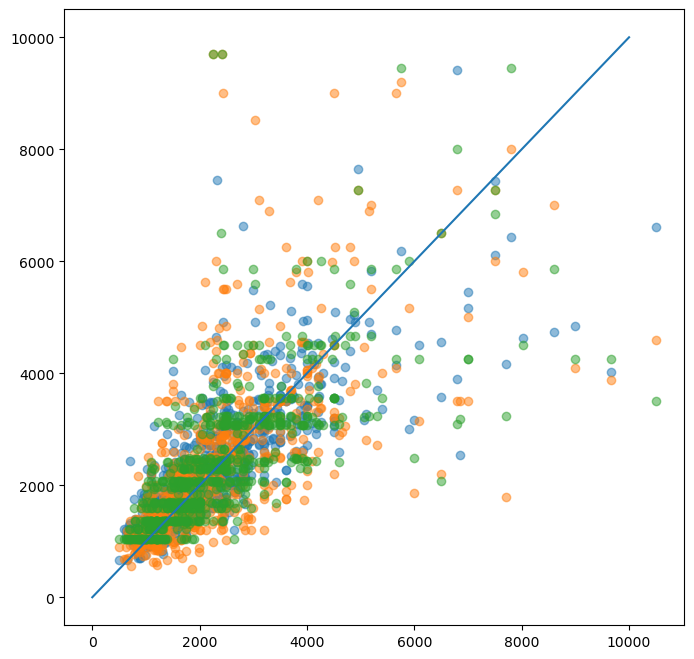

In [133]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_predict,alpha=0.5)
ax.scatter(y_test, y_predict_tree,alpha=0.5)
ax.scatter(y_test, y_predict_tree2,alpha=0.5)
ax.plot([0,10000],[0,10000])

plt.show()

**Traing other model**

In [137]:
# Using Random Forest
from sklearn.ensemble import RandomForestRegressor

In [138]:
# Making predict
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X_train, y_train)
y_predRF = regr.predict(X_test)

In [139]:
# Checking error
mean_absolute_error(y_test, y_predRF)

543.4624044572832

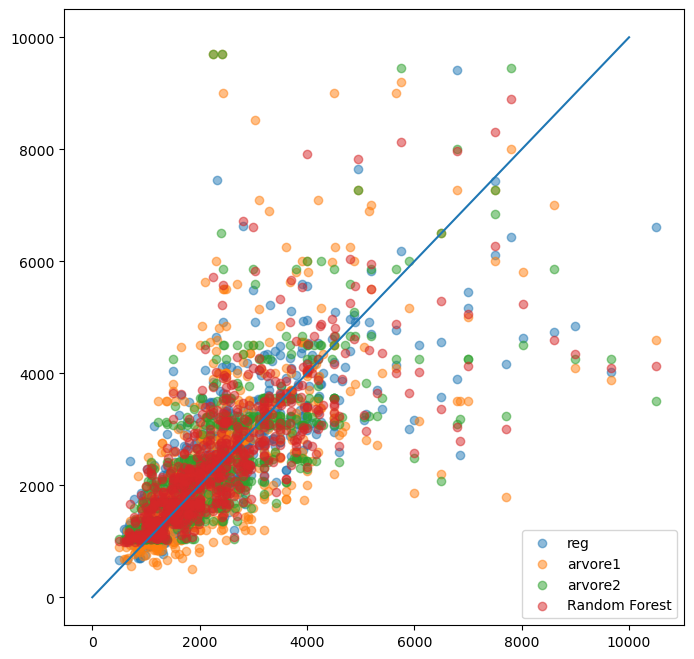

In [140]:

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_predict,alpha=0.5,label='reg')
ax.scatter(y_test, y_predict_tree,alpha=0.5,label='arvore1')
ax.scatter(y_test, y_predict_tree2,alpha=0.5,label='arvore2')
ax.scatter(y_test, y_predRF,alpha=0.5,label='Random Forest')
ax.plot([0,10000],[0,10000])

ax.legend()

plt.show()

<a id='deploy'></a>
## Deploy
-Model persistence
    - https://scikit-learn.org/stable/model_persistence.html?highlight=model+persistence


In [142]:
# Importing o dump do joblib
from joblib import dump, load

In [143]:
# Dumping the model we want to use (RandomForestRegressor)
dump(regr, 'Model_Regression.joblib') 

['Model_Regression.joblib']

In [144]:
X_test.columns

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')